# Section 1: Data Cleaning

In this **Section** we will cleaning **data** from the provided files, which are completely identical to each other.
For these purposes, we will choose a `*.csv` file, although the choice of one or another file extension for subsequent analysis is a matter of personal preference and personal choice of each of Data Analysts.

According to the CRISP-DM reference model, one of the phase is **Data preparation**  The data preparation phase covers all activities needed to construct the final dataset (data that will be fed into the modeling tool(s)) from the initial raw data. Data preparation tasks are likely to be performed multiple times and not in any prescribed order. Tasks include table, record, and attribute selection, as well as transformation and cleaning of data for modeling tools, which will be done below.

First of all, we have installed the necessary libraries that will help us in carrying out the process known as **Data Cleaning**.

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # We do this to ignore several specific warnings
warnings.filterwarnings("ignore")
sns.set(style="white")

In [7]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" # here is the hack in downloading this InteractivShell library,
# which then makes it possible to open several functions by writing them on one line

### Read Data
We use `pandas.read_csv()` function to read the `.*csv-file`. In the bracket, we put the file path along
with a quotation mark, so that pandas will read the file into a data frame from catalog JupiterNotebook.

In [8]:
df_survey = pd.read_csv('DAT_SeeD_AnalystTestData_RawToShare.csv') # reading *.csv-file for conducting analysis

#### Basic Insight of Dataset
After reading data into Pandas dataframe, it is time for us to explore the dataset. There are several
ways to obtain essential insights of the data to help us better understand our dataset.
**_It's always is Good Idea when we begining to analyse Data - get a general understanding of the available data set in the analyzed file._** 

In this case, we should get an idea of the overall dimension of the data set in the file ( `".shape"` command) and it would also be desirable to see several lines at the beginning and end of the file (the `".head()"` and `".tail()"` commands, which by default display 5 lines at the beginning and end the analyzed file.

In [9]:
df_survey.shape #get dimension of array

(1622, 235)

In the cell above, we see the size of our Data Frame, which is 1622 rows and 235 columns in which contain.

In [10]:
df_survey.head()
df_survey.tail()

,DATE,CaseID,DatasetOrigin,DEM2,DEM3,DEM5.1,DEM5.2,DEM8,DEM9,DEM10,...,Q46.3,Q46.4,Q46.5,Q46.6,Q47.1,Q47.2,Q47.3,Q48.1,Q48.2,Q48.3
0,18122017,,,,1,1,,,,,...,,,,,,,,,,
1,18122017,,,,1,1,,,,,...,,,,,,,,,,
2,18122017,1,1,1950,1,1,1,4,1,3,...,0,2,1,1,2,2,3,1,99,2
3,18122017,2,1,1990,2,1,1,6,3,4,...,1,2,3,0,3,2,0,0,2,3
4,18122017,3,1,1951,2,1,1,3,0,1,...,0,1,0,0,1,1,1,99,99,99


,DATE,CaseID,DatasetOrigin,DEM2,DEM3,DEM5.1,DEM5.2,DEM8,DEM9,DEM10,...,Q46.3,Q46.4,Q46.5,Q46.6,Q47.1,Q47.2,Q47.3,Q48.1,Q48.2,Q48.3
1617,20180121,,2,,,,,,,,...,,,,,,,,,,
1618,20180121,,2,,,,,,,,...,,,,,,,,,,
1619,20180121,,2,,,,,,,,...,,,,,,,,,,
1620,20180121,,2,,,,,,,,...,,,,,,,,,,
1621,20180121,,2,,,,,,,,...,,,,,,,,,,


In the cells above, we can clearly see WHAT EXACTLY our DataFrame is.
As in the beginning, in the few first lines, and at the end of the Frame we see a lot of missing values, which subsequently will need to be corrected or replaced/deleted for subsequent statistical analysis and deployment of the model. 

When we also must analyze a dataset, it’s always a **Good Idea** to start by getting basic information about your dataframe

In [11]:
df_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Columns: 235 entries, DATE to Q48.3
dtypes: int64(1), object(234)
memory usage: 2.9+ MB


In [12]:
#check data types of column
df_survey.dtypes

DATE              int64
CaseID           object
DatasetOrigin    object
DEM2             object
DEM3             object
DEM5.1           object
DEM5.2           object
DEM8             object
DEM9             object
DEM10            object
DEM11            object
DEM12            object
DEM13.1          object
DEM13.2          object
DEM13.3          object
DEM14            object
Q1A.1            object
Q1A.2            object
Q1A.3            object
Q1A.4            object
Q1B.1            object
Q1B.2            object
Q1B.3            object
Q2.1             object
Q2.2             object
Q2.3             object
Q2.4             object
Q3.1             object
Q3.2             object
Q3.3             object
                  ...  
Q43.1            object
Q43.2            object
Q43.3            object
Q43.4            object
Q43.5            object
Q43.6            object
Q43.7            object
Q43.8            object
Q43.9            object
Q44.1            object
Q44.2           

As the data in the cell above show, only one of the variables named `DATE` is of type `intenger64`, all other types are `objects`.

In [13]:
 df_survey.columns.values #get the list of column headers

array(['DATE', 'CaseID', 'DatasetOrigin', 'DEM2', 'DEM3', 'DEM5.1',
       'DEM5.2', 'DEM8', 'DEM9', 'DEM10', 'DEM11', 'DEM12', 'DEM13.1',
       'DEM13.2', 'DEM13.3', 'DEM14', 'Q1A.1', 'Q1A.2', 'Q1A.3', 'Q1A.4',
       'Q1B.1', 'Q1B.2', 'Q1B.3', 'Q2.1', 'Q2.2', 'Q2.3', 'Q2.4', 'Q3.1',
       'Q3.2', 'Q3.3', 'Q3.4', 'Q3.5', 'Q4.1', 'Q4.2', 'Q4.3', 'Q5.1',
       'Q5.2', 'Q5.3', 'Q6A.1', 'Q6A.3', 'Q6A.4', 'Q6A.5', 'Q6B.1',
       'Q6B.2', 'Q6B.3', 'Q7.1', 'Q7.2', 'Q7.3', 'Q8.1', 'Q8.2', 'Q8.3',
       'Q9.1', 'Q9.2', 'Q9.3', 'Q10.1', 'Q10.2', 'Q10.3', 'Q11.1',
       'Q11.2', 'Q11.3', 'Q11.4', 'Q12.1', 'Q12.2', 'Q12.3', 'Q13.1',
       'Q13.2', 'Q13.3', 'Q14.1', 'Q14.2', 'Q14.3', 'Q15.1', 'Q15.2',
       'Q15.3', 'Q15.4', 'Q15.5', 'Q15.6', 'Q16.1', 'Q16.2', 'Q16.3',
       'Q16.4', 'Q16.5', 'Q16.6', 'Q17', 'Q18.1', 'Q18.2', 'Q18.3',
       'Q18.4', 'Q18.5', 'Q18.6', 'Q19.1', 'Q19.2', 'Q19.3', 'Q20A.1',
       'Q20A.2', 'Q20A.3', 'Q20B.1', 'Q20B.2', 'Q20B.3', 'Q21.1', 'Q21.2',
       'Q2

In [14]:
df_survey.index.values # get the list of indicies

array([   0,    1,    2, ..., 1619, 1620, 1621], dtype=int64)

For consistency, ensure that all column labels of type string.
let's examine the types of the column labels following command (Output: `True` - all column labels of type is `string`, `False` - otherwise.

In [15]:
all(isinstance(column, str) for column in df_survey.columns)

True

As show the initial analysis of the data which leads us to the "understanding of the data", there are many missing values that need to be fixed for further statistical analysis.
So, how do we identify all those missing values and deal with them?
How to work with missing data?
Steps for working with missing data:
* Identify missing data
* deal with missing data correct data format
* Identify and handle missing values
* Identify missing values
* Convert “ ” to NaN
In the car dataset, missing data comes with the question mark “ ”. 

We replace “ ” with NaN (Not a Number), which is Python’s default missing value marker, for reasons of computational speed
and convenience. Here we use the function: to replace A by B

In [16]:
# replace " " to NaN
df_survey.replace(" ", np.nan, inplace = True)
df_survey.head(5)
df_survey.tail(5)

,DATE,CaseID,DatasetOrigin,DEM2,DEM3,DEM5.1,DEM5.2,DEM8,DEM9,DEM10,...,Q46.3,Q46.4,Q46.5,Q46.6,Q47.1,Q47.2,Q47.3,Q48.1,Q48.2,Q48.3
0,18122017,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18122017,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18122017,1,1,1950,1,1,1,4,1,3,...,0,2,1,1,2,2,3,1,99,2
3,18122017,2,1,1990,2,1,1,6,3,4,...,1,2,3,0,3,2,0,0,2,3
4,18122017,3,1,1951,2,1,1,3,0,1,...,0,1,0,0,1,1,1,99,99,99


,DATE,CaseID,DatasetOrigin,DEM2,DEM3,DEM5.1,DEM5.2,DEM8,DEM9,DEM10,...,Q46.3,Q46.4,Q46.5,Q46.6,Q47.1,Q47.2,Q47.3,Q48.1,Q48.2,Q48.3
1617,20180121,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1618,20180121,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1619,20180121,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1620,20180121,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1621,20180121,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Oh! These are really many missed values!
We can also notice another “strange feature” - in the column “DATE” in the first 5 rows the date format is presented as: `dd.mm.yyyy`.
But in the last 5 rows of our DataFrame, you can see some inconsistency in the date record compared to the first lines of the DateFrame. It is possible that the date format was entered in them as: `yyyy.mm.dd`. 

#### Evaluating for Missing Data
The missing values are converted to Python’s default. We use Python’s built-in functions to identify these missing values. There are two methods to detect missing data: `.isnull()` `.notnull()`.

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data

In [17]:
missing_data = df_survey.isnull() # If Data is missing - then "True", otherwise - "False"
missing_data.head(5)
missing_data.tail(5)

,DATE,CaseID,DatasetOrigin,DEM2,DEM3,DEM5.1,DEM5.2,DEM8,DEM9,DEM10,...,Q46.3,Q46.4,Q46.5,Q46.6,Q47.1,Q47.2,Q47.3,Q48.1,Q48.2,Q48.3
0,False,True,True,True,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,DATE,CaseID,DatasetOrigin,DEM2,DEM3,DEM5.1,DEM5.2,DEM8,DEM9,DEM10,...,Q46.3,Q46.4,Q46.5,Q46.6,Q47.1,Q47.2,Q47.3,Q48.1,Q48.2,Q48.3
1617,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1618,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1619,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1620,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1621,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [18]:
missing_data = df_survey.notnull() # If Data is missing - then "False", otherwise - "True"
missing_data.head(5)
missing_data.tail(5)

,DATE,CaseID,DatasetOrigin,DEM2,DEM3,DEM5.1,DEM5.2,DEM8,DEM9,DEM10,...,Q46.3,Q46.4,Q46.5,Q46.6,Q47.1,Q47.2,Q47.3,Q48.1,Q48.2,Q48.3
0,True,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


,DATE,CaseID,DatasetOrigin,DEM2,DEM3,DEM5.1,DEM5.2,DEM8,DEM9,DEM10,...,Q46.3,Q46.4,Q46.5,Q46.6,Q47.1,Q47.2,Q47.3,Q48.1,Q48.2,Q48.3
1617,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1618,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1619,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1620,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1621,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Thus, we made sure that Python correctly recognizes and displays the "missing" data in our DataFrame.

Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column.
As mentioned above, “True” represents a missing value, “False” means the value is present in the dataset. In the body of the for loop the method “.value_counts()” counts the number of “True” values (`.isnull()` method).


In [19]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts(True))
    print("")

DATE
True    1.0
Name: DATE, dtype: float64

CaseID
True     0.993218
False    0.006782
Name: CaseID, dtype: float64

DatasetOrigin
True     0.998767
False    0.001233
Name: DatasetOrigin, dtype: float64

DEM2
True     0.990752
False    0.009248
Name: DEM2, dtype: float64

DEM3
True     0.994451
False    0.005549
Name: DEM3, dtype: float64

DEM5.1
True     0.994451
False    0.005549
Name: DEM5.1, dtype: float64

DEM5.2
True     0.993218
False    0.006782
Name: DEM5.2, dtype: float64

DEM8
True     0.987053
False    0.012947
Name: DEM8, dtype: float64

DEM9
True     0.98582
False    0.01418
Name: DEM9, dtype: float64

DEM10
True     0.958693
False    0.041307
Name: DEM10, dtype: float64

DEM11
True     0.984587
False    0.015413
Name: DEM11, dtype: float64

DEM12
True     0.982121
False    0.017879
Name: DEM12, dtype: float64

DEM13.1
True     0.931566
False    0.068434
Name: DEM13.1, dtype: float64

DEM13.2
True     0.979655
False    0.020345
Name: DEM13.2, dtype: float64

DEM13.3
True

In the cell above the representation of the percentage (in decimal fractions) of the explicit values `True` and missing values `False` in our dataset.

In [20]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

DATE
True    1622
Name: DATE, dtype: int64

CaseID
True     1611
False      11
Name: CaseID, dtype: int64

DatasetOrigin
True     1620
False       2
Name: DatasetOrigin, dtype: int64

DEM2
True     1607
False      15
Name: DEM2, dtype: int64

DEM3
True     1613
False       9
Name: DEM3, dtype: int64

DEM5.1
True     1613
False       9
Name: DEM5.1, dtype: int64

DEM5.2
True     1611
False      11
Name: DEM5.2, dtype: int64

DEM8
True     1601
False      21
Name: DEM8, dtype: int64

DEM9
True     1599
False      23
Name: DEM9, dtype: int64

DEM10
True     1555
False      67
Name: DEM10, dtype: int64

DEM11
True     1597
False      25
Name: DEM11, dtype: int64

DEM12
True     1593
False      29
Name: DEM12, dtype: int64

DEM13.1
True     1511
False     111
Name: DEM13.1, dtype: int64

DEM13.2
True     1589
False      33
Name: DEM13.2, dtype: int64

DEM13.3
True     1594
False      28
Name: DEM13.3, dtype: int64

DEM14
True     1602
False      20
Name: DEM14, dtype: int64

Q1A.1
True     

And as we can see - in the cell above the absolute count of the explicit values `True` and missing values `False` is displayed in our dataset.

#### Deeper Researchers
Let us examine in more detail some of the columns from our data set, namely: Blocks - Q12, Q13, Q23, Q24, Q37, Q40, as well as Dem9 and Dem14.

**Block - Q12:**
consists of 3 columns - `'Q12.1'`, `'Q12.2'`, `'Q12.3'`.

Q12.1
True     0.98767
False    0.01233
True     1602
False      20
Name: Q12.1, dtype: float64

Q12.2
True     0.98767
False    0.01233
True     1602
False      20
Name: Q12.2, dtype: float64

Q12.3
True     0.98767
False    0.01233
Q12.3
True     1602
False      20
Name: Q12.3, dtype: float64

Thus, we see that the number of missing values in all three columns is “20” and is 1.233%.


**Block - Q13:**
consists of 3 columns - `'Q13.1'`, `'Q13.2'`, `'Q13.3'`.
Q13.1
True     0.98767
False    0.01233
True     1602
False      20
Name: Q13.1, dtype: float64

Q13.2
True     0.98767
False    0.01233
True     1602
False      20
Name: Q13.2, dtype: float64

Q13.3
True     0.98767
False    0.01233
True     1602
False      20
Name: Q13.3, dtype: float64

The number of missing values in that Block in all three columns is the same as in the BlockQ12 and is “20” and is 1.233%.

**Block - Q14:**
consists of 3 coumns - `'Q14.1'`, `'Q14.2'`, `'Q14.3'`

Q14.1
True     0.98767
False    0.01233
True     1602
False      20
Name: Q14.1, dtype: float64

Q14.2
True     0.98767
False    0.01233
True     1602
False      20
Name: Q14.2, dtype: float64

Q14.3
True     0.98767
False    0.01233
True     1602
False      20
Name: Q14.3, dtype: float64

The number of missing values in that Block in all three columns is the same as in the BlockQ12and Block13 and is “20” and is 1.233%.

**Block - 23:**
consists of 6 columns - `'Q23.1'`, `'Q23.2'`, `'Q23.3'`, `'Q23.4'`, `'Q23.5'`, `'Q23.6'`.

Q23.1
True     0.98767
False    0.01233
True     1602
False      20
Name: Q23.1, dtype: float64

Q23.2
True     0.98767
False    0.01233
True     1602
False      20
Name: Q23.2, dtype: float64

Q23.3
True     0.98767
False    0.01233
True     1602
False      20
Name: Q23.3, dtype: float64

Q23.4
True     0.98767
False    0.01233
True     1602
False      20
Name: Q23.4, dtype: float64

Q23.5
True     0.98767
False    0.01233
True     1602
False      20
Name: Q23.5, dtype: float64

Q23.6
True     0.98767
False    0.01233
True     1602
False      20
Name: Q23.6, dtype: float64

**Block - Q24:**
consists of 6 columns - `'Q24.1'`, `'Q24.2'`, `'Q24.3'`, `'Q24.4'`, `'Q24.5'`.
Q24.1
True     0.98767
False    0.01233
True     1602
False      20
Name: Q24.1, dtype: float64

Q24.2
True     0.98767
False    0.01233
True     1602
False      20
Name: Q24.2, dtype: float64

Q24.3
True     0.98767
False    0.01233
True     1602
False      20
Name: Q24.3, dtype: float64

Q24.4
True     0.98767
False    0.01233
True     1602
False      20
Name: Q24.4, dtype: int64

Q24.5
True     0.98767
False    0.01233
True     1602
False      20
Name: Q24.5, dtype: int64


And like the previous four Blocks (**Q12, Q13, Q14, Q23**), the data set here contains the same absolute = "20" and relative = "1.233%" amount of missing data, despite the difference in the number of columns in the analyzed Block and the four previous Blocks.

***Such an identity in the amount of missing data suggests that there is a systematic error in filling the Data Set, which can be caused by several different factors, but its presence is clearly emphasized by such stability of absolute and relative results.***

We also analyze the following Blocks and Questions: `Q37`, `Q40`, `Dem 9`, `Dem 14`.

So: 

**Block - Q37:**
consist of 8 columns - `Q37.1'`, `'Q37.2'`, `'Q37.3'`, `'Q37.4'`, `'Q37.5'`, `Q37.6`, `Q37.7`, `Q37.8`.

Q37.1
True     0.986436
False    0.013564
True     1600
False      22
Name: Q37.1, dtype: float64

Q37.2
True     0.985203
False    0.014797
True     1598
False      24
Name: Q37.2, dtype: float64

Q37.3
True     0.98582
False    0.01418
True     1599
False      23
Name: Q37.3, dtype: float64

Q37.4
True     0.984587
False    0.015413
True     1597
False      25
Name: Q37.4, dtype: float64

Q37.5
True     0.985203
False    0.014797
True     1598
False      24
Name: Q37.5, dtype: float64

Q37.6
True     0.985203
False    0.014797
True     1598
False      24
Name: Q37.6, dtype: float64

Q37.7
True     0.985203
False    0.014797
True     1598
False      24
Name: Q37.7, dtype: float64

Q37.8
True     0.984587
False    0.015413
True     1597
False      25
Name: Q37.8, dtype: float64

***In this case we can see some difference in the number and relative weight of missing values for different columns of this Block. This can indicate both a systematic error of data entry and their unintentional loss.***

**Block - Q40:**
consist of 5 columns - `Q40.1`, `Q40.2`, `Q40.3`, `Q40.4`, `Q40.5`.
Q40.1
True     0.98767
False    0.01233
True     1602
False      20
Name: Q40.1, dtype: float64

Q40.2
True     0.98767
False    0.01233
True     1602
False      20
Name: Q40.2, dtype: float64

Q40.3
True     0.98767
False    0.01233
True     1602
False      20
Name: Q40.3, dtype: float64

Q40.4
True     0.98767
False    0.01233
True     1602
False      20
Name: Q40.4, dtype: float64

Q40.5
True     0.98767
False    0.01233
True     1602
False      20
Name: Q40.5, dtype: float64

Here we can see the similarity of the amount of missing data with previous blocks, such as: **Q12, Q13, Q14, Q23, Q24**.
Such statistics are also observed in the column `Dem14` presented below:

DDEM14
True     0.98767
False    0.01233
True     1602
False      20
Name: DEM14, dtype: float64

But there are other indicators in column `Dem9`:


DEM9
True     0.98582
False    0.01418
True     1599
False      23
Name: DEM9, dtype: float64



**Thus, in six Blocks there is a clear presence of 20 missing data in each column.
The percentage of missing data is 1.233%, which in itself is not critical for statistical analysis, but in order to obtain the most correct statistical conclusion, we must take some steps to clear our data set from them. Block `Q37` and column `Dem9` are some variant indicatiors, which however are slightly different from all other analyzed Blocks and column `Dem9`**

## Deal with missing data##

How to deal with missing data?

**drop data**
1. drop the whole row 
2. drop the whole column

**replace data**
1. replace it by mean
2. replace it by frequency 
3. replace it based on other functions.

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. 

Before we apply any of these methods to many different columns that require our intervention to clear the data in them, we need to evaluate "what kind of data" are in the analyzed columns and what they represent.

### Column data analysis###

In order to _"quickly"_ understand what data is in the columns, as well as try to understand the nature of their origin, we can also use other software tools that the Data Analyst (Data Scientist) should use in its activities.
We can use several types of software, such as: Microsoft Excel or IBM SPSS. Both programs have a good set of tools for "filtering" data, which we apply.

Using filtering in Microsoft Excel, we found that the following columns have the following data ranges:
Dem9 - 0,1,2,3,99, NaN
Dem14 - 1,2,3, ..., 10 NaN
* Q12 - 0,1,2,3,99, NaN
* Q13 - 0,1,2,3,99, NaN
* Q14 - 0,1,2,3,99, NaN
* Q23 - 0,1,2,3,99, NaN
* Q24 - 0,1,2,3,99, NaN
* Q37 - 0,1,2,3,99, NaN
* Q40 - 0,1,2,3,4,5,6,99, NaN

Studying the sets of the above data, and on the assumption that we don’t know WHAT they represent, it is logical to assume that these are **ordinal data**, which are a “scale of relations” between certain entities and most likely they represent numbers on " Likert scale", which is often used to conduct any sociological or expert surveys. Moreover, in the first few columns we see data such as “Year of Birth”, “Male”, “Female”, “DatasetOrigin” and so on, which indicates the sociological nature of the origin of the data presented for analysis (if we open this file in the SPSS Statistiks program in the "Variables" mode in the "Label" column, we see all the explanatory questions for each of the columns).

### Reasoning about the method###

As indicated in the previous subsection, we encounter “ordinal data” in the selected columns, which are NOT to be summarized, which means it is NOT to be received `mean`. Therefore, the choice of method 
* 1. replace it by mean
**It makes no sense**.

By choosing this method, we can get as `mean` a certain number with a comma (`float64`), instead of the integer representation (`int64`) from “0” to “3” or to “10”, as well as the number “99 - The question is not applicable”. In addition, `mean` is very sensitive to the so-called `statistical outliers`, which is the number “99” for such a set as “0,1,2,3” and even “0,1,2, ..., 10” . Say we can get as “mean” the number “60” or “70”, which in itself does not have any logical and physical meaning in this ordinal scale.

Let's move on to the possibility of using the following method:
* 2. replace it by frequency.
As mentioned above, we have some sets of integers in a relatively small range, which should remain in it, while they also must be integers.
On this basis, the use of the method 
* 2. replace it by frequency
makes it possible to determine the frequency of a particular value and select the most common in this set, which will replace the missing data.
There are also other methods, as already indicated, but we will dwell on this method.

A few words about the **drop** method:
Of course, it would be tempting to simply delete those columns and rows that have numerous missing data, so that no further collisions would arise during the analysis, however, such a “delete”
* columns will lead to the fact that the semantic relationship between the asked questions will be lost;
* lines will lead to a decrease in the total number of "Observations", and a deterioration in the representativeness of the sample from the general population.

In addition, we do not know the **cost** that was spent to obtain each of the observations (line), which of course will adversely affect the performance indicators of the entire ***Project*** for conducting a large-scale sociological survey.

Let there be calculations!


To see which values are present in a particular column, we can use the “.value_counts()” method:

In [21]:
df_survey['DEM9'].value_counts()

1     594
2     452
0     259
3     259
99     35
Name: DEM9, dtype: int64

We can see that the number **"1"**  whose frequency of occurrence is **"594"** times is the most common type that respondents gave. We can also use the “.idxmax ()” method to automatically calculate the most common type:

In [22]:
df_survey['DEM9'].value_counts().idxmax()

'1'

Replace all the missing values in the column `Dem9` with the number `"1"`.

In [23]:
df_survey["DEM9"].replace(np.nan, "1", inplace=True)
print(df_survey["DEM9"].replace(np.nan, "1", inplace=True))

None


`None` are indicates that there are no more missing data in the column `DEM9`.

By the same way, we also replace all the missing data in the columns:

`'Q12.1'`, `'Q12.2'`, `'Q12.3'` `'Q13.1'`, `'Q13.2'`, `'Q13.3'`, `'Q14.1'`, `'Q14.2'`, `'Q14.3'`, `'Q23.1'`, `'Q23.2'`, `'Q23.3'`, `'Q23.4'`, `'Q23.5'`, `'Q23.6'`, `'Q24.1'`, `'Q24.2'`, `'Q24.3'`, `'Q24.4'`, `'Q24.5'`, 'DEM14'



In [24]:
df_survey["Q12.1"].value_counts()
df_survey['Q12.1'].value_counts().idxmax()

2     638
1     531
0     257
3     147
99     29
Name: Q12.1, dtype: int64

'2'

In [25]:
df_survey['Q12.1'].replace(np.nan, "2", inplace=True)
print(df_survey['Q12.1'].replace(np.nan, "2", inplace=True))

None


In [26]:
df_survey['Q12.2'].value_counts()
df_survey['Q12.2'].value_counts().idxmax()

2     714
1     472
0     282
3     115
99     19
Name: Q12.2, dtype: int64

'2'

In [27]:
df_survey['Q12.2'].replace(np.nan, "2", inplace=True)
print(df_survey['Q12.2'].replace(np.nan, "2", inplace=True))

None


In [28]:
df_survey['Q12.3'].value_counts()
df_survey['Q12.3'].value_counts().idxmax()

2     575
1     364
0     363
3     227
99     73
Name: Q12.3, dtype: int64

'2'

In [29]:
df_survey['Q12.3'].replace(np.nan, "2", inplace=True)
print(df_survey['Q12.3'].replace(np.nan, "2", inplace=True))

None


In [30]:
df_survey['Q13.1'].value_counts()
df_survey['Q13.1'].value_counts().idxmax()

1     557
2     407
0     361
3     251
99     26
Name: Q13.1, dtype: int64

'1'

In [31]:
df_survey['Q13.1'].replace(np.nan, "1", inplace=True)
print(df_survey['Q13.1'].replace(np.nan, "1", inplace=True))

None


In [32]:
df_survey['Q13.2'].value_counts()
df_survey['Q13.2'].value_counts().idxmax()

2     577
1     372
3     366
0     266
99     21
Name: Q13.2, dtype: int64

'2'

In [33]:
df_survey['Q13.2'].replace(np.nan, "2", inplace=True)
print(df_survey['Q13.2'].replace(np.nan, "2", inplace=True))

None


In [34]:
df_survey['Q13.3'].value_counts()
df_survey['Q13.3'].value_counts().idxmax()

2     594
1     552
0     328
3     110
99     18
Name: Q13.3, dtype: int64

'2'

In [35]:
df_survey['Q13.3'].replace(np.nan, "2", inplace=True)
print(df_survey['Q13.3'].replace(np.nan, "2", inplace=True))

None


In [36]:
df_survey['Q14.1'].value_counts()
df_survey['Q14.1'].value_counts().idxmax()

2     599
3     461
1     413
0      74
99     55
Name: Q14.1, dtype: int64

'2'

In [37]:
df_survey['Q14.1'].replace(np.nan, "2", inplace=True)
print(df_survey['Q14.1'].replace(np.nan, "2", inplace=True))

None


In [38]:
df_survey['Q14.2'].value_counts()
df_survey['Q14.2'].value_counts().idxmax()

2     664
3     632
1     144
0     107
99     55
Name: Q14.2, dtype: int64

'2'

In [39]:
df_survey['Q14.2'].replace(np.nan, "2", inplace=True)
print(df_survey['Q14.2'].replace(np.nan, "2", inplace=True))

None


In [40]:
df_survey['Q14.3'].value_counts()
df_survey['Q14.3'].value_counts().idxmax()

2     652
3     622
1     213
99     64
0      51
Name: Q14.3, dtype: int64

'2'

In [41]:
df_survey['Q14.3'].replace(np.nan, "2", inplace=True)
print(df_survey['Q14.3'].replace(np.nan, "2", inplace=True))

None


In [42]:
df_survey['Q23.1'].value_counts()
df_survey['Q23.1'].value_counts().idxmax()

1     607
0     546
2     307
3     125
99     17
Name: Q23.1, dtype: int64

'1'

In [43]:
df_survey['Q23.1'].replace(np.nan, "1", inplace=True)
print(df_survey['Q23.1'].replace(np.nan, "1", inplace=True))

None


In [44]:
df_survey['Q23.2'].value_counts()
df_survey['Q23.2'].value_counts().idxmax()

0     517
2     469
1     310
3     289
99     17
Name: Q23.2, dtype: int64

'0'

In [45]:
df_survey['Q23.2'].replace(np.nan, "0", inplace=True)
print(df_survey['Q23.2'].replace(np.nan, "0", inplace=True))

None


In [46]:
df_survey['Q23.3'].value_counts()
df_survey['Q23.3'].value_counts().idxmax()

1     531
2     519
0     404
3     119
99     29
Name: Q23.3, dtype: int64

'1'

In [47]:
df_survey['Q23.3'].replace(np.nan, "1", inplace=True)
print(df_survey['Q23.3'].replace(np.nan, "1", inplace=True))

None


In [48]:
df_survey['Q23.4'].value_counts()
df_survey['Q23.4'].value_counts().idxmax()

0     630
1     451
2     352
3     147
99     22
Name: Q23.4, dtype: int64

'0'

In [49]:
df_survey['Q23.4'].replace(np.nan, "0", inplace=True)
print(df_survey['Q23.4'].replace(np.nan, "0", inplace=True))

None


In [50]:
df_survey['Q23.5'].value_counts()
df_survey['Q23.5'].value_counts().idxmax()

0     970
1     337
2     213
3      58
99     24
Name: Q23.5, dtype: int64

'0'

In [51]:
df_survey['Q23.5'].replace(np.nan, "0", inplace=True)
print(df_survey['Q23.5'].replace(np.nan, "0", inplace=True))

None


In [52]:
df_survey['Q23.6'].value_counts()
df_survey['Q23.6'].value_counts().idxmax()

2     444
0     430
1     393
3     234
99    101
Name: Q23.6, dtype: int64

'2'

In [53]:
df_survey['Q23.6'].replace(np.nan, "2", inplace=True)
print(df_survey['Q23.6'].replace(np.nan, "6", inplace=True))

None


In [54]:
df_survey['Q24.1'].value_counts()
df_survey['Q24.1'].value_counts().idxmax()

2     802
1     646
0     123
99     31
Name: Q24.1, dtype: int64

'2'

In [55]:
df_survey['Q24.1'].replace(np.nan, "2", inplace=True)
print(df_survey['Q24.1'].replace(np.nan, "2", inplace=True))

None


In [56]:
df_survey['Q24.2'].value_counts()
df_survey['Q24.2'].value_counts().idxmax()

1     588
2     531
0     404
99     79
Name: Q24.2, dtype: int64

'1'

In [57]:
df_survey['Q24.2'].replace(np.nan, "1", inplace=True)
print(df_survey['Q24.2'].replace(np.nan, "1", inplace=True))

None


In [58]:
df_survey['Q24.3'].value_counts()
df_survey['Q24.3'].value_counts().idxmax()

1     613
2     544
0     344
99    101
Name: Q24.3, dtype: int64

'1'

In [59]:
df_survey['Q24.3'].replace(np.nan, "1", inplace=True)
print(df_survey['Q24.3'].replace(np.nan, "1", inplace=True))

None


In [60]:
df_survey['Q24.4'].value_counts()
df_survey['Q24.4'].value_counts().idxmax()

1     693
2     681
0     156
99     72
Name: Q24.4, dtype: int64

'1'

In [61]:
df_survey['Q24.4'].replace(np.nan, "1", inplace=True)
print(df_survey['Q24.4'].replace(np.nan, "1", inplace=True))

None


In [62]:
df_survey['Q24.5'].value_counts()
df_survey['Q24.5'].value_counts().idxmax()

2     957
1     541
0      59
99     45
Name: Q24.5, dtype: int64

'2'

In [63]:
df_survey['Q24.5'].replace(np.nan, "2", inplace=True)
print(df_survey['Q24.5'].replace(np.nan, "2", inplace=True))

None


In [64]:
df_survey['Q37.1'].value_counts()
df_survey['Q37.1'].value_counts().idxmax()

0     1039
1      475
2       83
99       3
Name: Q37.1, dtype: int64

'0'

In [65]:
df_survey['Q37.1'].replace(np.nan, "0", inplace=True)
print(df_survey['Q37.1'].replace(np.nan, "0", inplace=True))

None


In [66]:
df_survey['Q37.2'].value_counts()
df_survey['Q37.2'].value_counts().idxmax()

0     1012
1      478
2       98
99      10
Name: Q37.2, dtype: int64

'0'

In [67]:
df_survey['Q37.2'].replace(np.nan, "0", inplace=True)
print(df_survey['Q37.2'].replace(np.nan, "0", inplace=True))

None


In [68]:
df_survey['Q37.3'].value_counts()
df_survey['Q37.3'].value_counts().idxmax()

0     1234
1      319
2       41
99       5
Name: Q37.3, dtype: int64

'0'

In [69]:
df_survey['Q37.3'].replace(np.nan, "0", inplace=True)
print(df_survey['Q37.3'].replace(np.nan, "0", inplace=True))

None


In [70]:
df_survey['Q37.4'].value_counts()
df_survey['Q37.4'].value_counts().idxmax()

0     1300
1      250
2       42
99       5
Name: Q37.4, dtype: int64

'0'

In [71]:
df_survey['Q37.4'].replace(np.nan, "0", inplace=True)
print(df_survey['Q37.4'].replace(np.nan, "0", inplace=True))

None


In [72]:
df_survey['Q37.5'].value_counts()
df_survey['Q37.5'].value_counts().idxmax()

0     1421
1      148
2       18
99      11
Name: Q37.5, dtype: int64

'0'

In [73]:
df_survey['Q37.5'].replace(np.nan, "0", inplace=True)
print(df_survey['Q37.5'].replace(np.nan, "0", inplace=True))

None


In [74]:
df_survey['Q37.6'].value_counts()
df_survey['Q37.6'].value_counts().idxmax()

0     1214
1      322
2       53
99       9
Name: Q37.6, dtype: int64

'0'

In [75]:
df_survey['Q37.6'].replace(np.nan, "0", inplace=True)
print(df_survey['Q37.6'].replace(np.nan, "0", inplace=True))

None


In [76]:
df_survey['Q37.7'].value_counts()
df_survey['Q37.7'].value_counts().idxmax()

0     1224
1      315
2       54
99       5
Name: Q37.7, dtype: int64

'0'

In [77]:
df_survey['Q37.7'].replace(np.nan, "0", inplace=True)
print(df_survey['Q37.7'].replace(np.nan, "0", inplace=True))

None


In [78]:
df_survey['Q37.8'].value_counts()
df_survey['Q37.8'].value_counts().idxmax()

0     1368
1      174
2       38
99      17
Name: Q37.8, dtype: int64

'0'

In [79]:
df_survey['Q37.8'].replace(np.nan, "0", inplace=True)
print(df_survey['Q37.8'].replace(np.nan, "0", inplace=True))

None


In [80]:
df_survey['Q40.1'].value_counts()
df_survey['Q40.1'].value_counts().idxmax()

0     516
1     377
2     248
3     223
4      91
5      74
6      53
99     20
Name: Q40.1, dtype: int64

'0'

In [81]:
df_survey['Q40.1'].replace(np.nan, "0", inplace=True)
print(df_survey['Q40.1'].replace(np.nan, "0", inplace=True))

None


In [82]:
df_survey['Q40.2'].value_counts()
df_survey['Q40.2'].value_counts().idxmax()

0     398
1     313
3     211
2     199
5     174
4     146
6     134
99     27
Name: Q40.2, dtype: int64

'0'

In [83]:
df_survey['Q40.2'].replace(np.nan, "0", inplace=True)
print(df_survey['Q40.2'].replace(np.nan, "0", inplace=True))

None


In [84]:
df_survey['Q40.3'].value_counts()
df_survey['Q40.3'].value_counts().idxmax()

0     946
1     291
2     147
3     113
4      43
99     23
6      22
5      17
Name: Q40.3, dtype: int64

'0'

In [85]:
df_survey['Q40.3'].replace(np.nan, "0", inplace=True)
print(df_survey['Q40.3'].replace(np.nan, "0", inplace=True))

None


In [86]:
df_survey['Q40.4'].value_counts()
df_survey['Q40.4'].value_counts().idxmax()

0     618
1     280
3     199
2     175
4     115
6     102
5      83
99     30
Name: Q40.4, dtype: int64

'0'

In [87]:
df_survey['Q40.4'].replace(np.nan, "0", inplace=True)
print(df_survey['Q40.4'].replace(np.nan, "0", inplace=True))

None


In [88]:
df_survey['Q40.5'].value_counts()
df_survey['Q40.5'].value_counts().idxmax()

0     1013
1      257
2      110
3      106
4       48
99      24
6       24
5       20
Name: Q40.5, dtype: int64

'0'

In [89]:
df_survey['Q40.5'].replace(np.nan, "0", inplace=True)
print(df_survey['Q40.5'].replace(np.nan, "0", inplace=True))

None


In [90]:
df_survey['DEM14'].value_counts()
df_survey['DEM14'].value_counts().idxmax()

5     262
10    251
7     216
8     214
6     167
9     154
4     103
3      78
0      61
2      52
1      32
99     12
Name: DEM14, dtype: int64

'5'

In [91]:
df_survey['DEM14'].replace(np.nan, "5", inplace=True)
print(df_survey['DEM14'].replace(np.nan, "5", inplace=True))

None


***Good! Now, we obtain the dataset with no missing values in in the columns selected for analysis.***

Now we can use the same methods as at the very beginning of our process, which is called "Understanding Data" according to "CRISP DM", to see HOW our data has changed in the columns with which we worked.

In [92]:
df_survey.head()
df_survey.tail()
df_survey.info()

,DATE,CaseID,DatasetOrigin,DEM2,DEM3,DEM5.1,DEM5.2,DEM8,DEM9,DEM10,...,Q46.3,Q46.4,Q46.5,Q46.6,Q47.1,Q47.2,Q47.3,Q48.1,Q48.2,Q48.3
0,18122017,NaN,NaN,NaN,1,1,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18122017,NaN,NaN,NaN,1,1,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18122017,1,1,1950,1,1,1,4,1,3,...,0,2,1,1,2,2,3,1,99,2
3,18122017,2,1,1990,2,1,1,6,3,4,...,1,2,3,0,3,2,0,0,2,3
4,18122017,3,1,1951,2,1,1,3,0,1,...,0,1,0,0,1,1,1,99,99,99


,DATE,CaseID,DatasetOrigin,DEM2,DEM3,DEM5.1,DEM5.2,DEM8,DEM9,DEM10,...,Q46.3,Q46.4,Q46.5,Q46.6,Q47.1,Q47.2,Q47.3,Q48.1,Q48.2,Q48.3
1617,20180121,NaN,2,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1618,20180121,NaN,2,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1619,20180121,NaN,2,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1620,20180121,NaN,2,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1621,20180121,NaN,2,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Columns: 235 entries, DATE to Q48.3
dtypes: int64(1), object(234)
memory usage: 2.9+ MB


**_Amazing!_**

**Look how the `missing data` in the rows was filled with the number `“1”` in the column example, which was most often found in the answers and with which we replaced the `missing data` in the amount of 23 in this column.**

In [93]:
df_survey.shape #get dimension of array

(1622, 235)

But the dimension of array don't has changed (Cell above).

**We also noticed another oddity in observations `7` through `23`, in which there are a lot of missing data in the rows (Screenshot recieved from IBM SPSS Staticics)** 
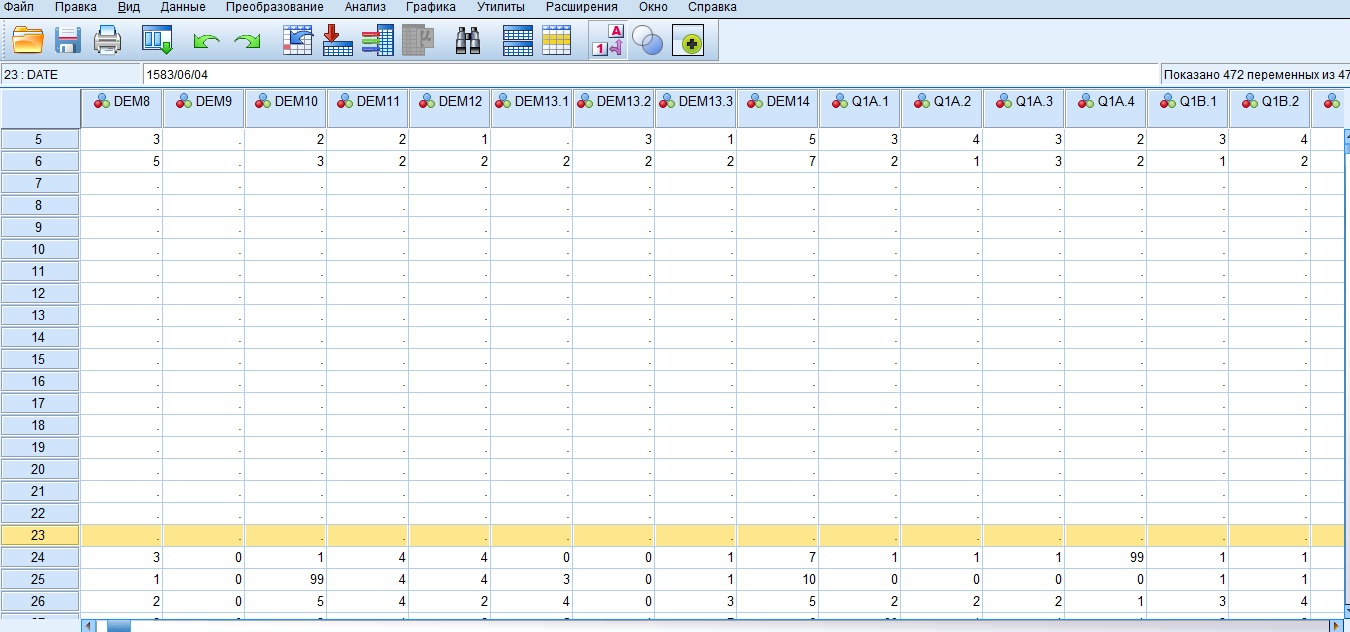

**In addition, we noticed the same “dirty” observations in the `rows` from number `1604` to number `1621`, and although we pointed out the undesirability of deleting lines from the data set in general, nevertheless, when conducting a regression analysis or constructing a decision tree, these lines will confuse performed calculations and simulations, which nevertheless require their complete removal.**

## Closing
At the end of handling with the Data Preparing and Clearing data in ***Section 1***, we write the modified data set to a file using the `"to`" function and give the file a new name so that it differs from the original data file, which could always be used in case of irreversible loss or unwanted data changes that may occur when working with them.

In [94]:
df_survey.to_csv('DAT_SeeD_AnalystTestData_RawToShare_Clearing.csv')

In [97]:
df_survey.to_excel('DAT_SeeD_AnalystTestData_RawToShare_Clearing.xlsx')